In [1]:
import numpy as np
import matplotlib.pyplot as plt

from synthlearners import Synth
from synthlearners.simulator import (
    SimulationConfig,
    PanelSimulator,
    FactorDGP,
)
from synthlearners.plotting import SynthPlotter

## Basic use with Panel Matrices

In [2]:
config = SimulationConfig(
    N=100,
    T=50,
    T_pre=40,
    n_treated=10,
    selection_mean=1.0,
    treatment_effect=0.5,
    dgp=FactorDGP(K=2, sigma=1, time_fac_lb=-0.1, time_fac_ub=0.1, trend_sigma=0.0001),
)
simulator = PanelSimulator(config)
Y, Y_0, L, treated_units = simulator.simulate()

### ridge

Choosing regularization parameter using sequential cross-validation


Computing jackknife estimates:   0%|          | 0/100 [00:00<?, ?it/s]

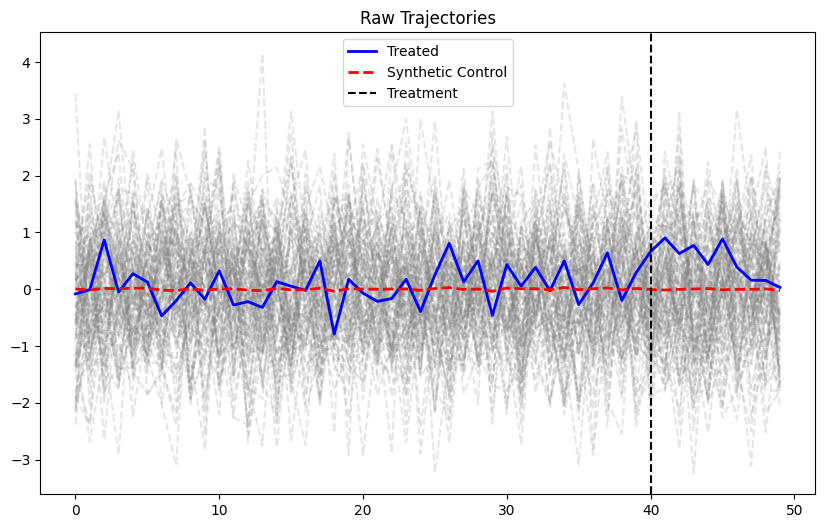

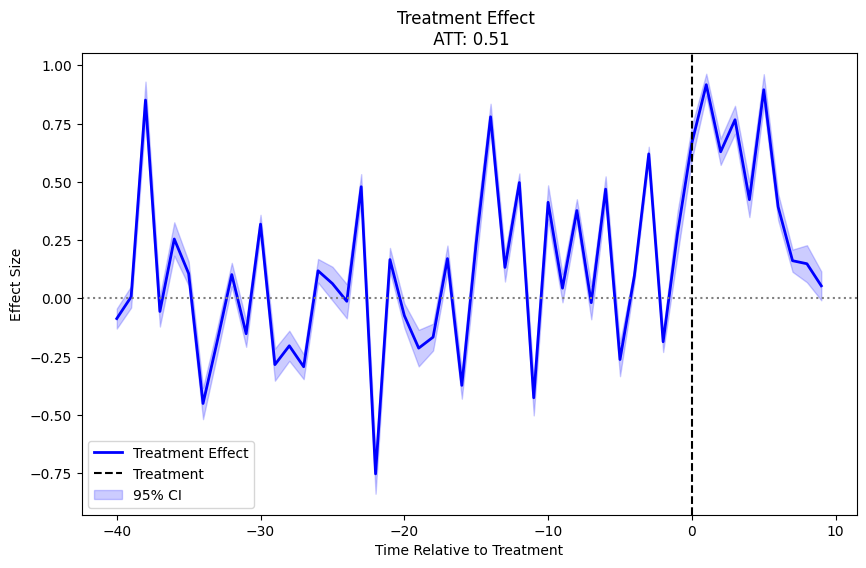

In [3]:
synth = Synth(
    method="lp_norm",
    p=2.0,
    n_jobs=-1,
    lam_grid=np.logspace(-4, 2, 40),
)
results = synth.fit(
    Y,
    treated_units,
    config.T_pre,
    compute_jackknife=True,
)
# Plot raw data
synth.plot(results, Y, treated_units, config.T_pre, mode="raw")
plt.show()
synth.plot(results, Y, treated_units, config.T_pre, mode="effect", show_ci=True)
plt.show()

### lasso

Choosing regularization parameter using sequential cross-validation


Computing jackknife estimates:   0%|          | 0/100 [00:00<?, ?it/s]

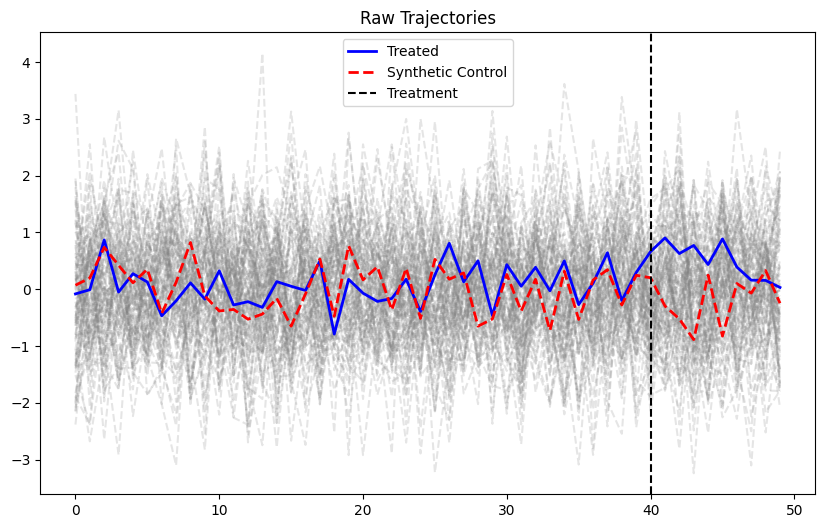

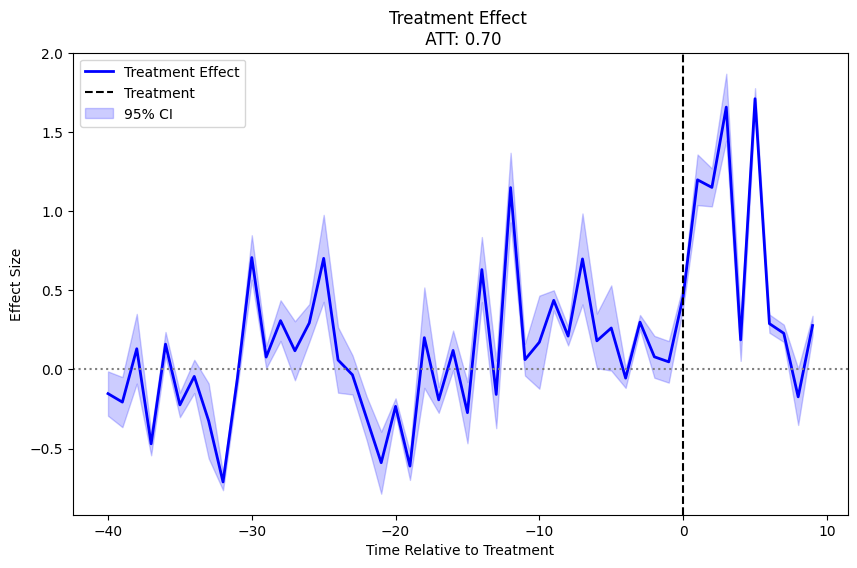

In [4]:
# Fit synthetic control
synth = Synth(method="lp_norm", p=1.0, n_jobs=-1)
results = synth.fit(
    Y,
    treated_units,
    config.T_pre,
    compute_jackknife=True,
)
# Plot raw data
synth.plot(results, Y, treated_units, config.T_pre, mode="raw")
plt.show()
synth.plot(results, Y, treated_units, config.T_pre, mode="effect", show_ci=True)
plt.show()

### OLS

Computing jackknife estimates:   0%|          | 0/100 [00:00<?, ?it/s]

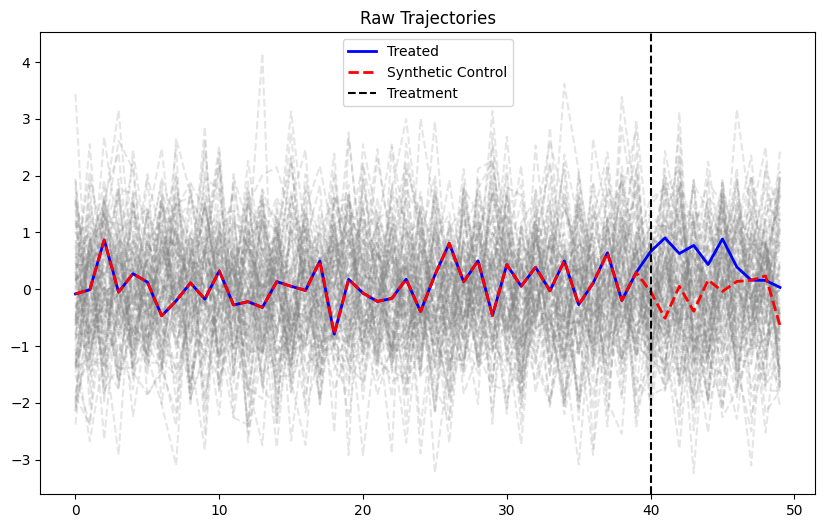

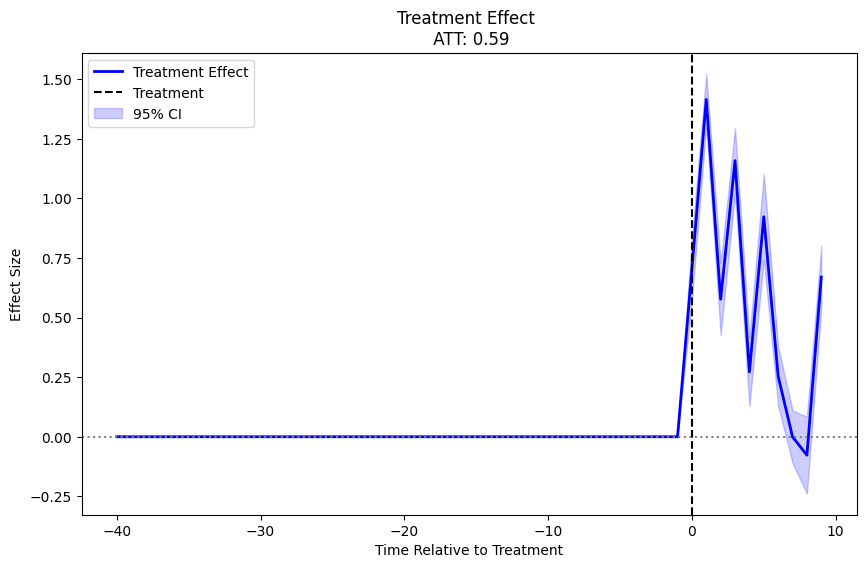

In [5]:
synth = Synth(method="linear", n_jobs=8)
results = synth.fit(
    Y,
    treated_units,
    config.T_pre,
    compute_jackknife=True,
)
# Plot raw data
synth.plot(results, Y, treated_units, config.T_pre, mode="raw")
plt.show()
synth.plot(results, Y, treated_units, config.T_pre, mode="effect", show_ci=True)
plt.show()

### Simplex Regression (Original Synthetic Control)

Computing jackknife estimates:   0%|          | 0/100 [00:00<?, ?it/s]

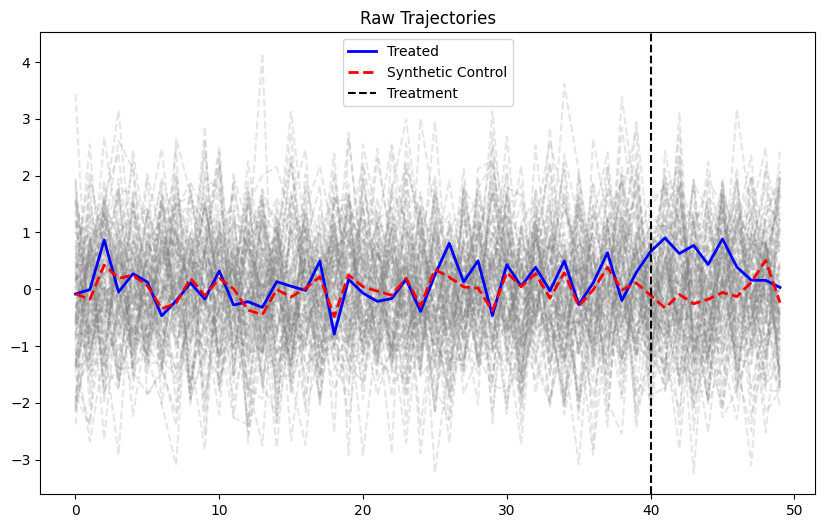

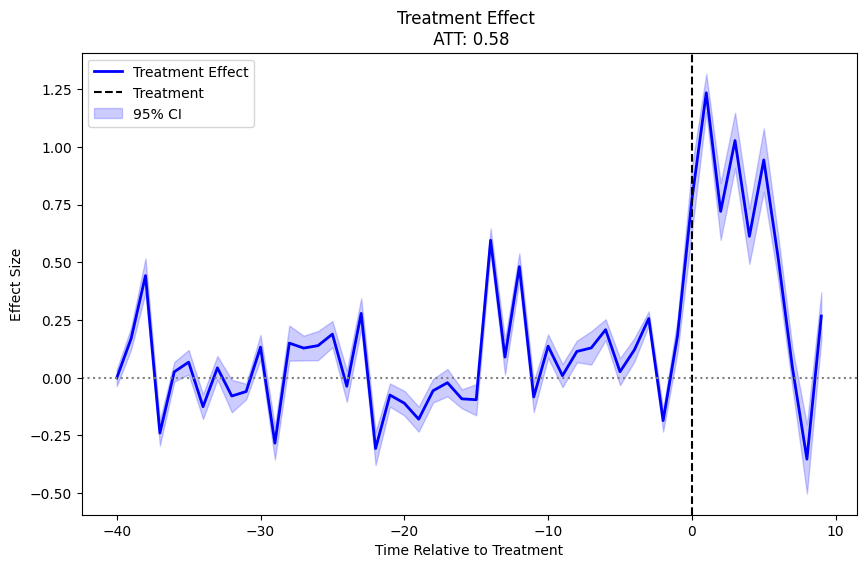

In [6]:
synth = Synth(method="simplex", n_jobs=-1)
results = synth.fit(
    Y,
    treated_units,
    config.T_pre,
    compute_jackknife=True,
)
# Plot
synth.plot(results, Y, treated_units, config.T_pre, mode="raw")
plt.show()
synth.plot(results, Y, treated_units, config.T_pre, mode="effect", show_ci=True)
plt.show()

### matching

Computing jackknife estimates:   0%|          | 0/100 [00:00<?, ?it/s]

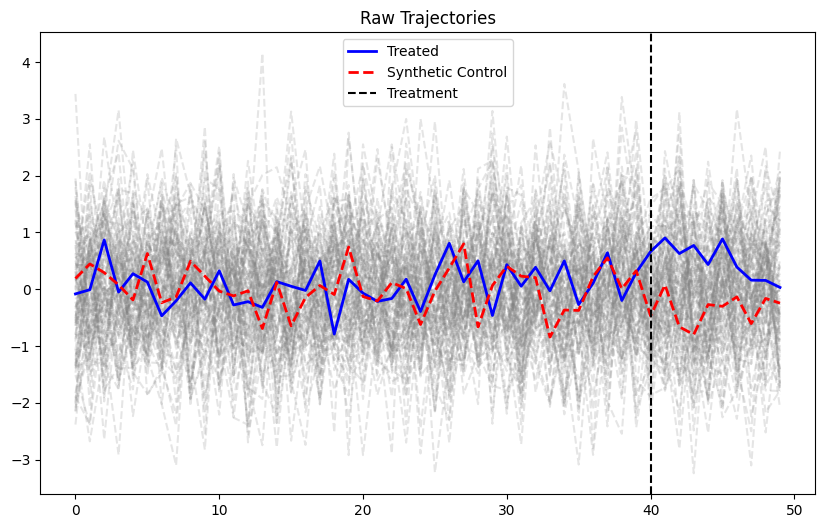

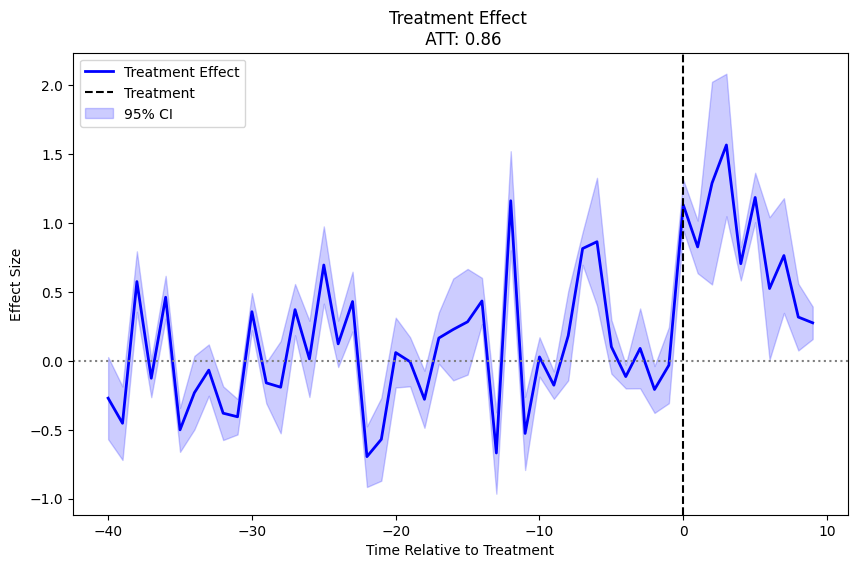

In [7]:
synth = Synth(method="matching", n_jobs=8)
results = synth.fit(
    Y,
    treated_units,
    config.T_pre,
    compute_jackknife=True,
)
# Plot
synth.plot(results, Y, treated_units, config.T_pre, mode="raw")
plt.show()
synth.plot(results, Y, treated_units, config.T_pre, mode="effect", show_ci=True)
plt.show()

## Advanced use

In [8]:
# Setup simulation
config = SimulationConfig(N=100, T=50, T_pre=40, treatment_effect=2.0)
simulator = PanelSimulator(config)
Y, Y_0, L, treated_units = simulator.simulate()

### multiple estimators 

In [9]:
# Fit multiple synthetic controls
synth_methods = [
    Synth(method="lp_norm", p=1.0),
    Synth(method="lp_norm", p=2.0),
    Synth(method="linear"),
    Synth(method="simplex"),
    Synth(method="matching"),
]

results = [
    method.fit(Y, treated_units, config.T_pre, compute_jackknife=False)
    for method in synth_methods
]

Choosing regularization parameter using sequential cross-validation
Choosing regularization parameter using sequential cross-validation


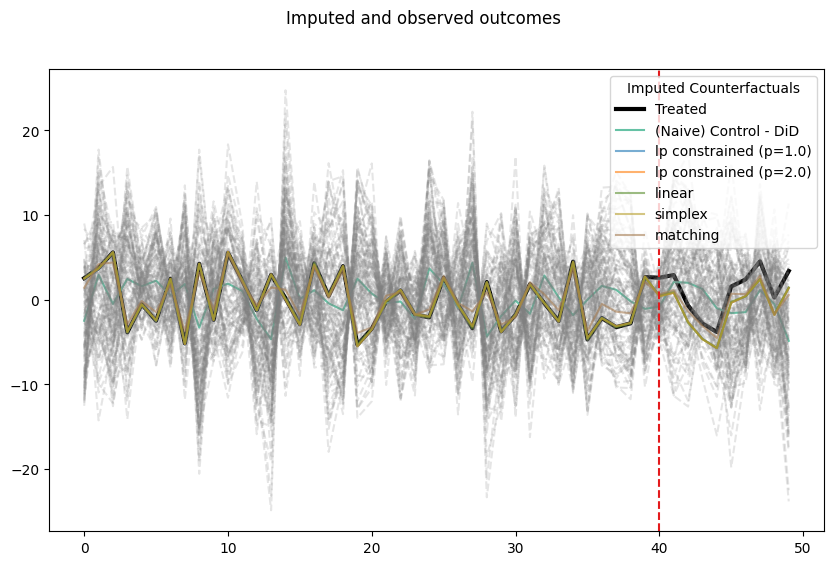

In [10]:
# Create plot
plotter = SynthPlotter()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plotter.plot_trajectories(
    results, Y, treated_units, config.T_pre, ax=ax, show_controls=True
)
fig.suptitle("Imputed and observed outcomes")
plt.show()

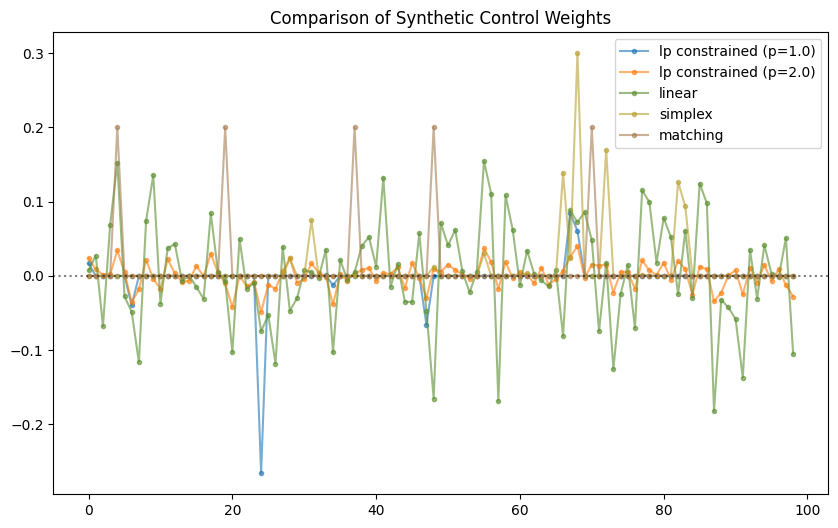

In [11]:
# Plot weights comparison
plotter.plot_weights(results, plot_type="comparison")
plt.show()